# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [8]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[ 1.37798572, -0.6978153 ],
        [ 0.04157425,  1.11646588],
        [ 0.77926531,  1.36555215],
        [-0.39250706, -2.22885474],
        [ 0.70636067, -0.65370387]]),
 array([1, 0, 0, 0, 1]))

In [9]:
n = 500

m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [18]:
# sampling

# generate samples
X1 = np.random.multivariate_normal(m1, sigma, n)
X2 = np.random.multivariate_normal(m2, sigma, n)

# assign labels
Y1 = np.ones(n)
Y2 = -np.ones(n)

# combine the samples and labels
X_generative = np.concatenate((X1, X2), axis=0)
Y_generative = np.concatenate((Y1, Y2), axis=0)

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?

YES

#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [23]:
# computing beta_0 and beta using the formulas

sigma_inv = np.linalg.inv(sigma)
beta = sigma_inv.dot(m1 - m2)
pi1 = 0.5
beta_0 = np.log(pi1) - np.log(1 - pi1) + m2.dot(sigma_inv.dot(m2))/2 - m1.dot(sigma_inv.dot(m1))/2

# print estimated coefficients and intercept
print("Estimated Coefficients (beta_hat):", beta)
print("Estimated Intercept (intercept_hat):", beta_0)

Estimated Coefficients (beta_hat): [2. 2.]
Estimated Intercept (intercept_hat): -2.0


In [25]:
# a logistic model

# fit logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_generative, Y_generative)

# get estimated coefficients (beta_hat) and intercept (intercept_hat)
beta = logistic_model.coef_[0]
beta_0 = logistic_model.intercept_[0]

# print estimated coefficients and intercept
print("Estimated Coefficients (beta_hat):", beta)
print("Estimated Intercept (intercept_hat):", beta_0)

Estimated Coefficients (beta_hat): [1.88236598 1.75498672]
Estimated Intercept (intercept_hat): -1.9039103152248669


### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [28]:
# parameters
n = 500
m1 = np.array([1, 1])
m2 = np.array([0, 0])
sigma = np.array([[1, -0.5], [-0.5, 1]])
beta_0 = -2
beta = np.array([2, 2])

# generate sample from Gaussian mixture
X_m1 = np.random.multivariate_normal(m1, sigma, n)
X_m2 = np.random.multivariate_normal(m2, sigma, n)
X_discriminative = np.concatenate((X_m1, X_m2), axis=0)

# generate yi from Bernoulli distribution
linear_combination = beta_0 + np.dot(X_discriminative, beta)
p_success = 1 / (1 + np.exp(-linear_combination))
Y_discriminative = np.random.binomial(1, p_success)

In [29]:
# fit logistic regression model
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_discriminative, Y_discriminative)

# extract estimated coefficients
intercept_hat = mod_b.intercept_[0]
coefficients_hat = mod_b.coef_[0]

# true coefficients
beta_0_true = -2
beta_true = np.array([2, 2])

# print the results
print("True Intercept (beta_0):", beta_0_true)
print("True Coefficients (beta):", beta_true)
print("Estimated Intercept (beta_0_hat):", intercept_hat)
print("Estimated Coefficients (beta_hat):", coefficients_hat)

True Intercept (beta_0): -2
True Coefficients (beta): [2 2]
Estimated Intercept (beta_0_hat): -2.055932060688917
Estimated Coefficients (beta_hat): [1.82864117 2.09058907]


#### Second bullet point

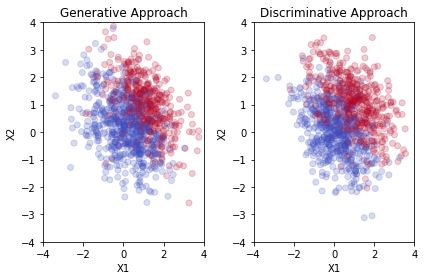

In [32]:
# scatter plot for generative approach
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:, 0], X_generative[:, 1], c=Y_generative, alpha=0.2, cmap='coolwarm')
plt.title('Generative Approach')
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(-4, 4)
plt.xlim(-4, 4)

# scatter plot for discriminative approach
plt.subplot(1, 2, 2)
plt.scatter(X_discriminative[:, 0], X_discriminative[:, 1], c=Y_discriminative, alpha=0.2, cmap='coolwarm')
plt.title('Discriminative Approach')
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(-4, 4)
plt.xlim(-4, 4)

# show the plot
plt.tight_layout()
plt.show()

What distinguishes the generative approach from the discriminative approach?

Both the generative and discriminative approaches aim to solve classification problems, but they differ in their modeling strategies. While both approaches can produce similar joint distributions (as seen in scatterplots), they vary in how they handle data generation and modeling.

In the generative approach, we model the joint distribution of features and labels. However, it's important to note that in this approach, estimating the conditional probability P(Y∣X) directly is not possible. The generative approach entails modeling both P(X∣Y) and P(Y), and the relationship between them is inherent in the modeling process.

On the other hand, the discriminative approach directly models P(Y∣X) without explicitly considering P(X) or P(Y). This approach focuses solely on learning the decision boundary between different classes based on the input features.

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

We start with the equation for $ p(y=1|x) $:

$ p(y=1|x) = \frac{\pi p(x|y=1)}{\pi p(x|y=1) + (1-\pi) p(x|y=-1)}. $

Now, we rearrange to obtain a formula for $ p(x|y=-1) $:

$ p(x|y=-1) = \frac{\pi p(x|y=1) (1- p(y=1|x))}{p(y=1|x)(1-\pi)}. $

Substituting 

$ p(x|y=1) = \exp(-x) $

$ p(y=1|x) = 1/(1+\exp(-\beta_0-\beta_1 x)) $

$ p(y=-1|x) = 1/(1+\exp(\beta_0+\beta_1 x)) $

we get:

$ p(x|y=-1) = \frac{\pi \exp(-x)}{\exp(\beta_0+\beta_1 x)(1-\pi)} $


Q2, Q3

Yes, that's correct. Once $ \pi $ is fixed, we do have freedom to choose the intercept in the logistic model. 

Even though $ \pi $ is not explicitly provided, the logistic regression algorithm will estimate the intercept term $ \beta_0 $ based on the observed data and its distribution. 

In [47]:
beta1 = 1
n1 = 1000
n2 = 2000

b_0 = -np.log((1 - pi_c)/pi_c * (beta1 + 1))

print( "Intercept based on pi and Coefficients: ",  b_0)

Intercept based on pi and Coefficients:  -1.3862943611198908
